In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Credit_card.csv")
df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [5]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

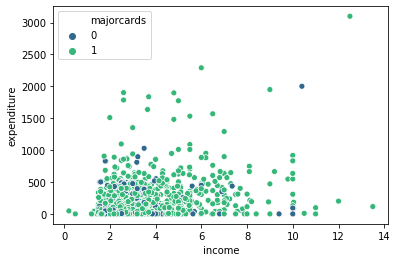

In [6]:
sns.scatterplot(x='income', y='expenditure', hue='majorcards', data=df, palette='viridis')

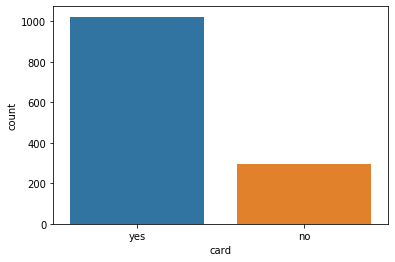

In [7]:
sns.countplot(x='card', data=df)

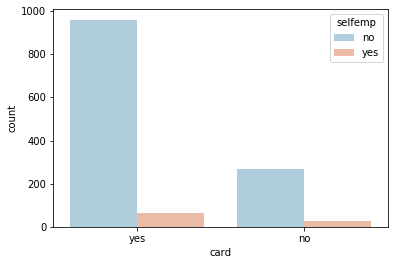

In [8]:
sns.countplot(x='card', hue='selfemp',data=df, palette='RdBu_r')

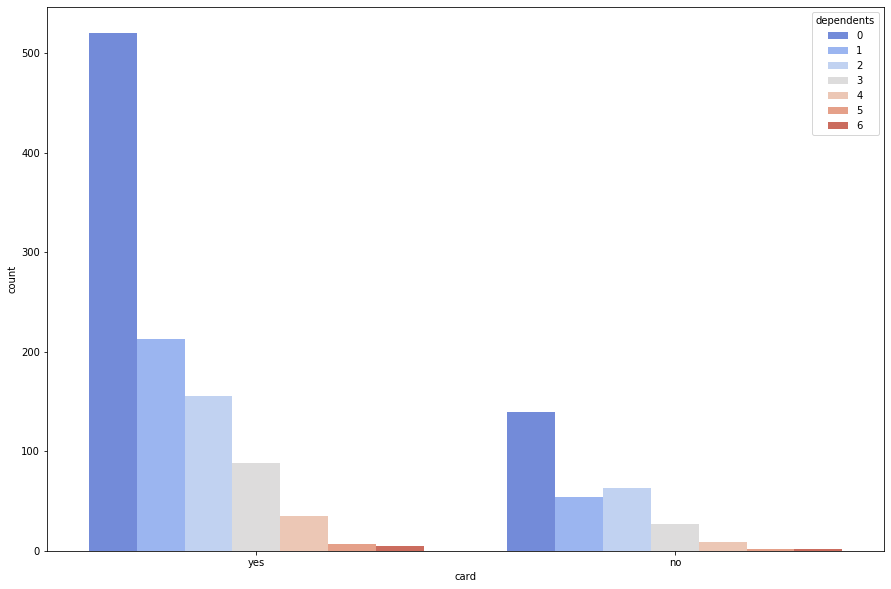

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='card', hue='dependents', data=df, palette='coolwarm')

In [10]:
sns.set_style('whitegrid')

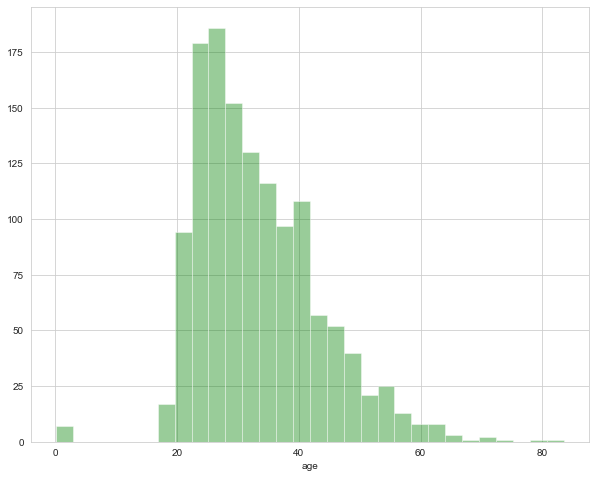

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'], bins=30, color='green', kde=False)

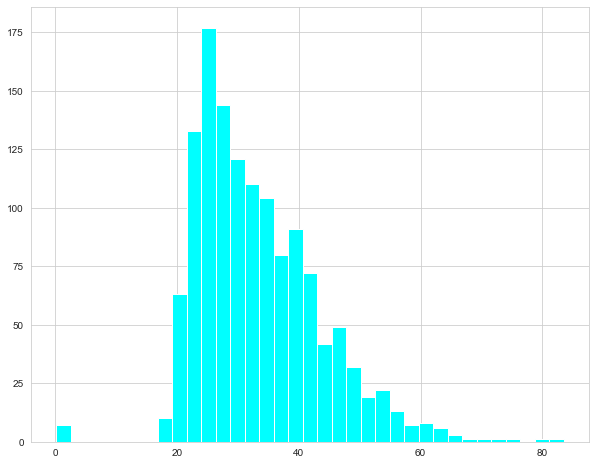

In [12]:
df['age'].hist(bins=35,figsize=(10,8),color='cyan')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


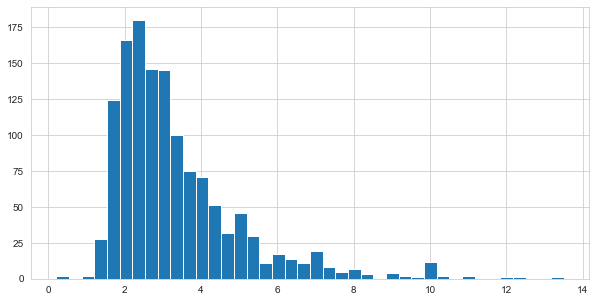

In [14]:
df['income'].hist(bins=40,figsize=(10,5))

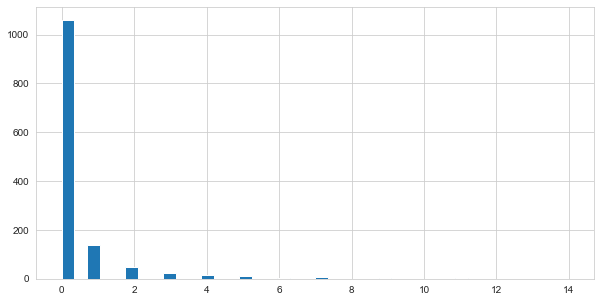

In [15]:
df['reports'].hist(bins=40,figsize=(10,5))

In [19]:
import cufflinks as cf

In [20]:
cf.go_offline()

In [21]:
df['income'].iplot(kind='hist')

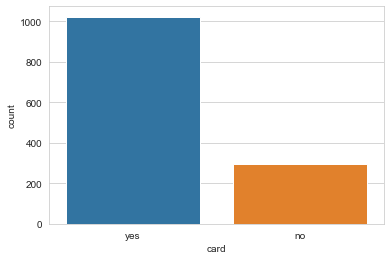

In [22]:
sns.countplot(df['card'])

In [23]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [24]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,recall_score

In [26]:
# We will perform the data processing as we need to fit the data to logistic model.

from sklearn.preprocessing import LabelEncoder

In [27]:
Lbe = LabelEncoder()

In [28]:
Column = df.columns

In [29]:
for Column in df.columns:
    if df[Column].dtype=='object':
        df[Column] = Lbe.fit_transform(df[Column])
    else:
        pass

In [30]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [31]:
# Split data into X and Y variable

X = df.iloc[:,2:]
print(X.head())

Y = df.iloc[:,0]
print(Y.head())

        age  income     share  expenditure  owner  selfemp  dependents  \
0  37.66667  4.5200  0.033270   124.983300      1        0           3   
1  33.25000  2.4200  0.005217     9.854167      0        0           3   
2  33.66667  4.5000  0.004156    15.000000      1        0           4   
3  30.50000  2.5400  0.065214   137.869200      0        0           0   
4  32.16667  9.7867  0.067051   546.503300      1        0           2   

   months  majorcards  active  
0      54           1      12  
1      34           1      13  
2      58           1       5  
3      25           1       7  
4      64           1       5  
0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int32


In [38]:
# splitting data into Train and Test data

from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25, random_state=42)

In [42]:
# We will now import logistic regression and fit data

from sklearn.linear_model import LogisticRegression

In [43]:
LRC = LogisticRegression(solver='liblinear',random_state=0)

In [44]:
LRC.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
LRC.classes_

array([0, 1])

In [46]:
LRC.intercept_

array([-1.57083522])

In [48]:
LRC.coef_

array([[ 1.24732684e-02, -1.83812616e-01, -9.65276264e-04,
         1.70729854e+00,  6.81959590e-01,  1.14114854e-01,
        -7.42755738e-01, -9.32796164e-03, -1.99230638e-01,
         2.72438196e-03]])

In [49]:
y_pred_prob = LRC.predict_log_proba(X_test)[:,1]
y_pred_prob

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1681: RuntimeWarning:

divide by zero encountered in log



array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.44249065e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.94440195e+00, -1.28123512e-10, -2.69068932e+00,
       -4.19070833e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.27187858e+00,  0.00000000e+00,  0.00000000e+00, -1.07378054e-07,
        0.00000000e+00,  0.00000000e+00, -2.35226093e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.20207806e+00,
        0.00000000e+00, -1.58695081e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.08566221e-07,
       -4.02904904e+00,  0.00000000e+00, -1.74763017e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.00373137e+00, -2.27991502e+00,
       -5.13221558e-07, -2.09027652e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.14414806e+00,  0.00000000e+00, -3.81988254e+00,
        0.00000000e+00,  

In [50]:
y_pred = LRC.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [51]:
from sklearn import metrics

In [52]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LRC.predict_proba(X_test)[:,1])
FPR, TPR, Threshold

(array([0.        , 0.        , 0.        , 0.        , 0.03947368,
        0.03947368, 0.15789474, 0.15789474, 0.28947368, 0.28947368,
        0.34210526, 0.34210526, 0.47368421, 0.47368421, 0.75      ,
        0.75      , 0.77631579, 0.77631579, 1.        ]),
 array([0.        , 0.88582677, 0.89370079, 0.97244094, 0.97244094,
        0.97637795, 0.97637795, 0.98031496, 0.98031496, 0.98425197,
        0.98425197, 0.98818898, 0.98818898, 0.99212598, 0.99212598,
        0.99606299, 0.99606299, 1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.86090939e-01,
        2.09506098e-01, 1.74186247e-01, 1.33620403e-01, 1.32530010e-01,
        1.14793841e-01, 1.13378471e-01, 1.02292899e-01, 9.59981561e-02,
        6.70742945e-02, 6.56596671e-02, 2.99806745e-02, 2.82587884e-02,
        2.52102310e-02, 2.45523356e-02, 1.50326195e-03]))

In [54]:
ROC_AUC = roc_auc_score(y_test,y_pred)

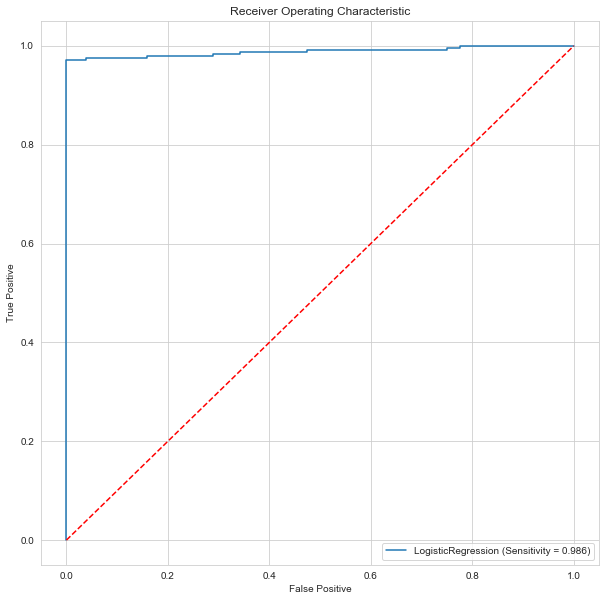

In [56]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label = 'LogisticRegression (Sensitivity = %0.3f)' %ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')

In [57]:
LRC.score(X_train,y_train)

0.9838220424671386

In [59]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 76,   7],
       [  0, 247]], dtype=int64)

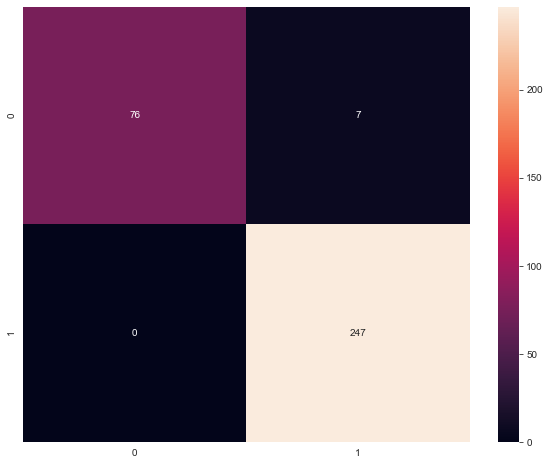

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='.3g')

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.97      0.99       254

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



In [62]:
recall_score(y_test,y_pred)

0.9724409448818898

In [63]:
Accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :', str(round(Accuracy*100,2)),'%')

Accuracy : 97.88 %


In [71]:
# Lets improve by tuning the logistic model.

LRC1 = LogisticRegression(solver='liblinear', C = 0.05, random_state = 0)

In [72]:
LRC1.fit(X_train,y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
LRC1.intercept_

array([-0.20078892])

In [74]:
LRC1.coef_

array([[-3.19411422e-02, -1.85226645e-01,  1.64476205e-04,
         8.19182770e-01,  1.21354183e-01,  1.90908482e-02,
        -2.59244000e-01, -5.78834735e-03, -9.60080440e-02,
        -6.41066189e-05]])

In [75]:
LRC1.predict_proba(X_test)[:,1]

array([1.        , 1.        , 1.        , 1.        , 0.99999932,
       1.        , 1.        , 1.        , 1.        , 0.05309613,
       0.99989768, 0.05693706, 0.02484449, 1.        , 1.        ,
       1.        , 0.08835293, 1.        , 1.        , 0.99924951,
       1.        , 1.        , 0.1252473 , 1.        , 1.        ,
       1.        , 1.        , 0.03268109, 0.99999997, 0.99006715,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99903972, 0.04215882, 1.        , 0.15761613, 1.        ,
       1.        , 1.        , 0.17832423, 0.15300543, 0.99691521,
       0.16009288, 1.        , 1.        , 1.        , 0.03943412,
       1.        , 0.07101874, 1.        , 1.        , 0.07680298,
       1.        , 1.        , 0.17647715, 1.        , 1.        ,
       0.0616976 , 0.06953429, 0.99999988, 1.        , 0.01822411,
       1.        , 0.17969471, 0.04183055, 1.        , 0.11920428,
       1.        , 1.        , 1.        , 1.        , 1.     

In [79]:
y_pred1 = LRC1.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [80]:
LRC1.score(X_test,y_test)

0.9787878787878788

In [81]:
conf_mat = confusion_matrix(y_test,y_pred1)
conf_mat

array([[ 76,   0],
       [  7, 247]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.97      0.99       254

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



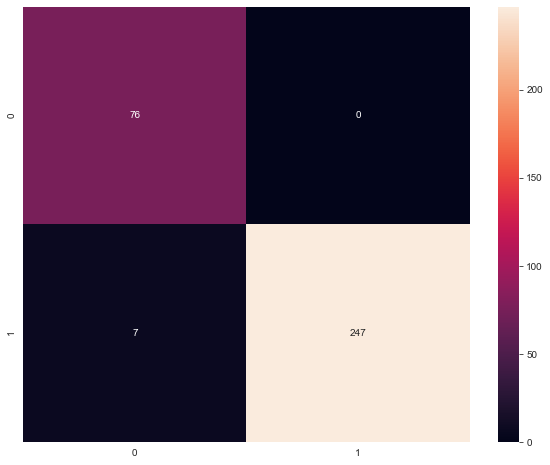

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt ='.3g')

In [84]:
from sklearn import metrics

In [85]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LRC1.predict_proba(X_test)[:,1])
FPR, TPR, Threshold

(array([0.        , 0.        , 0.        , 0.        , 0.03947368,
        0.03947368, 0.09210526, 0.09210526, 0.11842105, 0.11842105,
        0.17105263, 0.17105263, 0.39473684, 0.39473684, 0.81578947,
        0.81578947, 0.97368421, 0.97368421, 1.        ]),
 array([0.        , 0.7992126 , 0.81102362, 0.97244094, 0.97244094,
        0.97637795, 0.97637795, 0.98031496, 0.98031496, 0.98425197,
        0.98425197, 0.98818898, 0.98818898, 0.99212598, 0.99212598,
        0.99606299, 0.99606299, 1.        , 1.        ]),
 array([2.        , 1.        , 1.        , 0.74663736, 0.21318037,
        0.17969471, 0.17424222, 0.17138902, 0.16009288, 0.15761613,
        0.1511392 , 0.14729772, 0.09738629, 0.09655064, 0.04856377,
        0.04610014, 0.01663742, 0.0109387 , 0.0029236 ]))

In [87]:
ROC_AUC = roc_auc_score(y_test,y_pred1)
ROC_AUC

0.9862204724409449

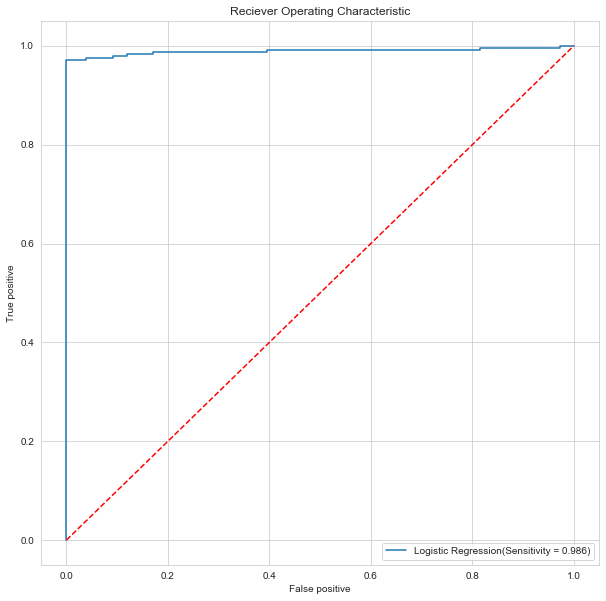

In [88]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label = 'Logistic Regression(Sensitivity = %0.3f)' % ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('Reciever Operating Characteristic')
plt.legend(loc = 'lower right')

In [89]:
threshold = [0.1, 0.25, 0.8, 0.9]
threshold[1]

0.25

In [90]:
for i in threshold:
    Logistic_grid = ((LRC1.predict_proba(X_test)[:,1])>= i).astype(int)
    print('Valuation for test data only :',[i])
    print(classification_report(y_test,y_pred))
    print('Valuation for test data only (new threshold):')
    print(classification_report(y_test, Logistic_grid))
    print('---------------------------------------------------\n\n')

Valuation for test data only : [0.1]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.97      0.99       254

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330

Valuation for test data only (new threshold):
              precision    recall  f1-score   support

           0       0.94      0.66      0.78        76
           1       0.91      0.99      0.95       254

    accuracy                           0.91       330
   macro avg       0.92      0.82      0.86       330
weighted avg       0.91      0.91      0.91       330

---------------------------------------------------


Valuation for test data only : [0.25]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.97      0.99       254

    acc

In [ ]:
# We will now